In [ ]:
import tensorflow as tf
import sys

print(tf.__version__)
print(sys.version)

2.5.0
3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]


In [1]:
cd /content/drive/MyDrive/security2

/content/drive/MyDrive/security2


In [2]:
from keras.preprocessing.text import Tokenizer 
import pandas as pd
import glob

files0 = glob.glob("0/*.txt")
files1 = glob.glob("1/*.txt")
df = pd.DataFrame(columns = ['label', 'file'])
number0 = 0
number1 = 0

for file in files0:
    with open(file, 'r') as f:
        line = f.read().replace('\n',' ')
        number0 += 1
        result = [(0,line)]
        dfnew = pd.DataFrame(result, columns = ['label', 'file'])
        df = df.append(dfnew, ignore_index = True)
        

for file in files1:
    with open(file,'r') as f:
        line = f.read().replace('\n',' ')
        number1 +=1
        result = [(1,line)]
        dfnew = pd.DataFrame(result, columns = ['label', 'file'])
        df = df.append(dfnew, ignore_index = True)

In [3]:
from sklearn.model_selection import train_test_split             
from keras.preprocessing.text import Tokenizer                    
from keras.preprocessing.sequence import pad_sequences

file = df['file'].values
y = df['label'].values

sentences_train,sentences_test,y_train,y_test = train_test_split(
                                                file, y,  
                                                test_size=0.25,  
                                                random_state=1000)

tokenizer = Tokenizer(num_words=500000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)

X_test = tokenizer.texts_to_sequences(sentences_test)
# Adding 1 because of  reserved 0 index
vocab_size = len(tokenizer.word_index) + 1                          

maxlen = 1000

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [4]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Embedding, Flatten
from keras import optimizers
embedding_dim = 100

def cnn1():
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(128, 5, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model
model = cnn1()    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         30200     
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 95,629
Trainable params: 95,629
Non-trainable params: 0
_________________________________________________________________


In [5]:
import numpy as np
X_train=np.asarray(X_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)

X_test = np.asarray(X_test).astype(np.int)
y_test=np.asarray(y_test).astype(np.int)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100)

print('\nAccuracy: {:.4f}'.format(model.evaluate(X_test, y_test)[1]))


Epoch 1/100
158/158 [==============================] - 45s 19ms/step - loss: 0.5310 - accuracy: 0.7518 - val_loss: 0.3225 - val_accuracy: 0.8495
Epoch 2/100
158/158 [==============================] - 3s 16ms/step - loss: 0.2772 - accuracy: 0.8805 - val_loss: 0.2554 - val_accuracy: 0.8917
Epoch 3/100
158/158 [==============================] - 2s 16ms/step - loss: 0.2168 - accuracy: 0.9047 - val_loss: 0.2381 - val_accuracy: 0.8977
Epoch 4/100
158/158 [==============================] - 3s 16ms/step - loss: 0.1576 - accuracy: 0.9374 - val_loss: 0.2181 - val_accuracy: 0.9096
Epoch 5/100
158/158 [==============================] - 2s 16ms/step - loss: 0.1291 - accuracy: 0.9544 - val_loss: 0.2166 - val_accuracy: 0.9161
Epoch 6/100
158/158 [==============================] - 2s 16ms/step - loss: 0.1092 - accuracy: 0.9598 - val_loss: 0.2161 - val_accuracy: 0.9185
Epoch 7/100
158/158 [==============================] - 3s 16ms/step - loss: 0.0885 - accuracy: 0.9726 - val_loss: 0.2255 - val_accuracy

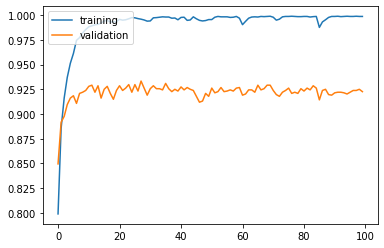

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [11]:
from keras.layers import Reshape, Conv2D, GlobalMaxPooling2D

def cnn2():
    model = Sequential()

    model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(Reshape((maxlen, embedding_dim, 1), input_shape = (maxlen, embedding_dim)))
    model.add(Conv2D(filters = 50, kernel_size = (5, embedding_dim), strides = (1,1), padding = 'valid'))
    model.add(GlobalMaxPooling2D())

    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    adam = optimizers.Adam(lr = 0.001)

    model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
    
    return model

model = cnn2()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1000, 100)         30200     
_________________________________________________________________
reshape (Reshape)            (None, 1000, 100, 1)      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 996, 1, 50)        25050     
_________________________________________________________________
global_max_pooling2d (Global (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dropout (Dropout)            (None, 10)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
import numpy as np
X_train=np.asarray(X_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)

X_test = np.asarray(X_test).astype(np.int)
y_test=np.asarray(y_test).astype(np.int)

history = model.fit(X_train, y_train, batch_size = 50,
                    validation_data=(X_test, y_test),
                    epochs=100)

print('\nAccuracy: {:.4f}'.format(model.evaluate(X_test, y_test)[1]))

Epoch 1/100
101/101 [==============================] - 9s 65ms/step - loss: 0.6828 - accuracy: 0.7063 - val_loss: 0.6310 - val_accuracy: 0.8198
Epoch 2/100
101/101 [==============================] - 6s 57ms/step - loss: 0.6126 - accuracy: 0.8085 - val_loss: 0.5450 - val_accuracy: 0.8293
Epoch 3/100
101/101 [==============================] - 6s 57ms/step - loss: 0.5274 - accuracy: 0.8459 - val_loss: 0.4451 - val_accuracy: 0.8798
Epoch 4/100
101/101 [==============================] - 6s 57ms/step - loss: 0.4438 - accuracy: 0.8664 - val_loss: 0.3852 - val_accuracy: 0.8834
Epoch 5/100
101/101 [==============================] - 6s 58ms/step - loss: 0.3555 - accuracy: 0.8958 - val_loss: 0.3209 - val_accuracy: 0.8983
Epoch 6/100
101/101 [==============================] - 6s 59ms/step - loss: 0.3024 - accuracy: 0.9175 - val_loss: 0.2947 - val_accuracy: 0.9030
Epoch 7/100
101/101 [==============================] - 6s 59ms/step - loss: 0.2681 - accuracy: 0.9303 - val_loss: 0.2928 - val_accuracy:

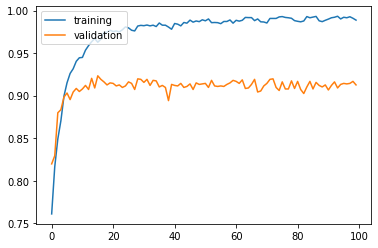

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
print("Accuracy: {}".format(classifier.score(X_test,y_test))) #test for accuracy


Accuracy: 0.817965496728138


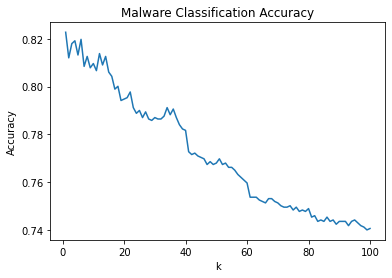

In [18]:
k_list = range(1,101)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    accuracies.append(classifier.score(X_test,y_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Malware Classification Accuracy")
plt.show()

In [19]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
print("Accuracy: {}".format(classifier.score(X_test,y_test)))

Accuracy: 0.8227245687091017


In [ ]:
!python knn.py                                           

Accuracy: 0.8921933085501859
